In [ ]:
#Colleen McGroarty Project 
#NOTE THAT I DID THIS OVER A FEW DAYS AND AT SOME POINT THERE WAS AN ERROR WITH THE SHEET WHERE IT DIDNT SAVE ALL THE WORK. 
#I TRIED TO COPY PAST WORK OVER INTO THIS NEW DOCUMENT BUT SOME PIECES WERE LOST AND I HAD TO TRY TO RECREATE...HOPING NOTHING GOT LOST...

In [103]:
import matplotlib.pyplot as plt

%matplotlib inline

In [104]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
# 1. Exploratory data analysis.

# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column

In [105]:
X.shape

(506, 13)

In [106]:
print(X)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [107]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [108]:
X.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [109]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [110]:
X.index

RangeIndex(start=0, stop=506, step=1)

In [111]:
X[X['CHAS']==0]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [112]:
X.CRIM.value_counts()

14.33370    2
0.01501     2
0.08265     1
0.53700     1
1.35472     1
           ..
13.67810    1
0.88125     1
0.01951     1
0.49298     1
0.03578     1
Name: CRIM, Length: 504, dtype: int64

In [113]:
X.ZN.value_counts()

0.0      372
20.0      21
80.0      15
12.5      10
22.0      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
21.0       4
95.0       4
60.0       4
33.0       4
75.0       3
35.0       3
28.0       3
55.0       3
52.5       3
70.0       3
34.0       3
85.0       2
82.5       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64

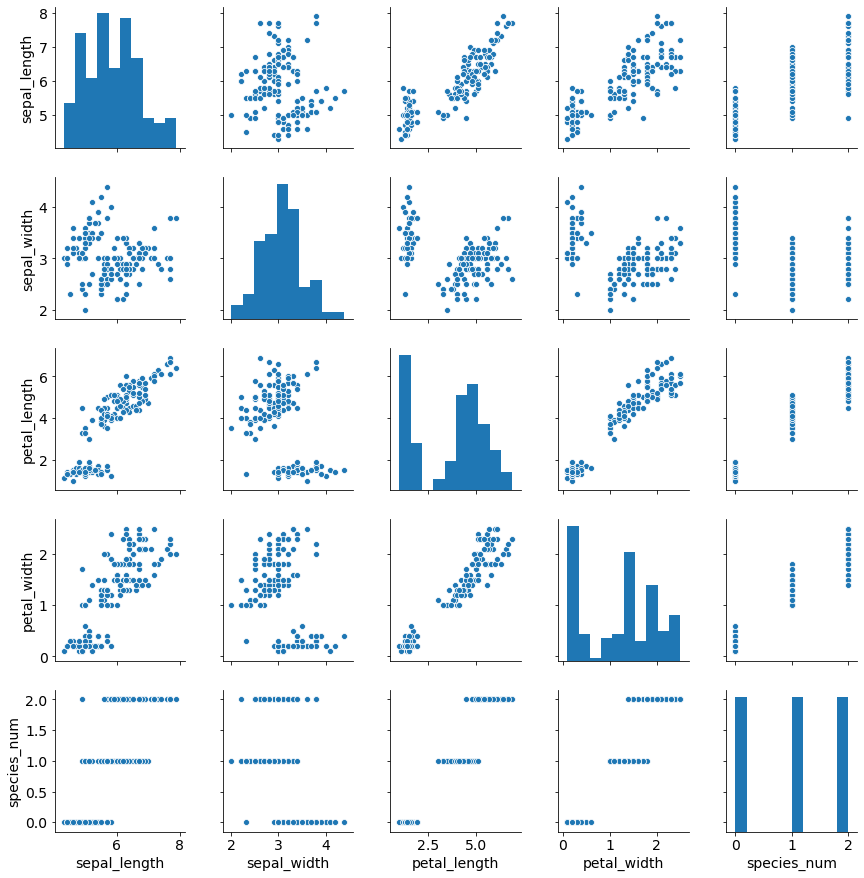

In [86]:
sns.pairplot(boston);

In [ ]:
#finding: The data looks correct and clean with results that match the categories they represent. 

In [ ]:
#2. Using scikit-learn Linear Regression
#2. Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict our target variable, MEDV.
#Score and plot your predictions. What do these results tell us?

In [114]:
import seaborn as sns

In [115]:
df = pd.concat([X,y], axis=1)

In [118]:
feature_cols = ['CRIM','RM','LSTAT']
X = df[feature_cols]
y = df.MEDV


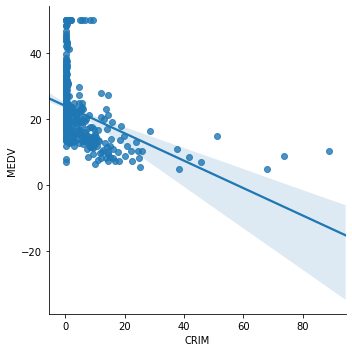

In [119]:
sns.lmplot(x='CRIM', y='MEDV', data=df);

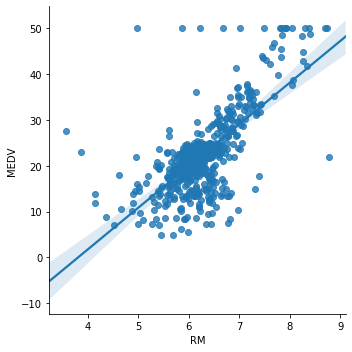

In [120]:
sns.lmplot(x='RM', y='MEDV', data=df);

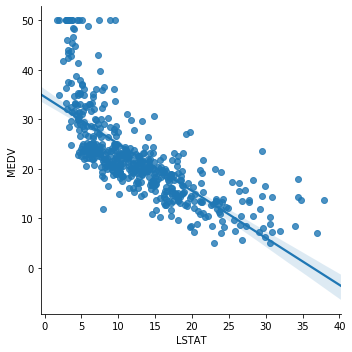

In [121]:
sns.lmplot(x='LSTAT', y='MEDV', data=df);

In [122]:

from sklearn.linear_model import LinearRegression


X = X[feature_cols]
y = y

# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [123]:
print(linreg.intercept_)
print(linreg.coef_)

-2.5622510119283994
[-0.10294089  5.21695492 -0.57848582]


In [ ]:
#for increase in CRIM, MEDV decreases 
#For increase in RM, MEDC increases 
#For Increase in LSTAT, decrease in MEDV 

In [ ]:
# 3. Try 70/30 and 90/10 train/test splits (70% of the data for training - 30% for testing, then 90% for training - 10% for testing)
#Score and plot. How do your metrics change? What does this tell us about the size of training/testing splits?

In [124]:
# Instansiate the model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
linreg = LinearRegression()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7, random_state=123)

# fit the model
linreg.fit(X_test, y_test)

# predict
y_pred_7 = linreg.predict(X_test)

# Score the model
np.sqrt(metrics.mean_squared_error(y_test, y_pred_7))

5.595282775771202

In [125]:
# Instansiate the model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
linreg = LinearRegression()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.9, random_state=123)

# fit the model
linreg.fit(X_test, y_test)

# predict
y_pred_9 = linreg.predict(X_test)

# Score the model
np.sqrt(metrics.mean_squared_error(y_test, y_pred_9))

5.515484107074083

In [ ]:
#4. Use k-fold cross validation varying the number of folds from 5 to 10
#What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. 
#What are the tradeoffs associated with choosing the number of folds?

In [126]:
from sklearn import model_selection
kf = model_selection.KFold(n_splits=5, shuffle=True)
mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 21.11853792998636
R2: 0.6440362488375538

Model 2
MSE: 59.727316203000385
R2: 0.6418547895022484

Model 3
MSE: 21.904038420004994
R2: 0.6449093750160502

Model 4
MSE: 20.15976092025783
R2: 0.6455079891825002

Model 5
MSE: 34.56334686411851
R2: 0.6425080233361709

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 31.494600067473613
Mean of R2 for all folds: 0.6437632851749047


In [127]:
from sklearn import model_selection
kf = model_selection.KFold(n_splits=10, shuffle=True)
mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 48.71170934877844
R2: 0.6453239262416788

Model 2
MSE: 35.10352790830504
R2: 0.6457638563805034

Model 3
MSE: 29.28806186676696
R2: 0.6452158328114703

Model 4
MSE: 30.004319804272882
R2: 0.6456667206591946

Model 5
MSE: 28.283170755106067
R2: 0.6450918377436015

Model 6
MSE: 21.269293275261067
R2: 0.6456762621660247

Model 7
MSE: 21.479583150818303
R2: 0.6457330690572808

Model 8
MSE: 15.850350629094592
R2: 0.6455003152327625

Model 9
MSE: 24.0271591033194
R2: 0.6456104085587407

Model 10
MSE: 56.01080624789146
R2: 0.6417116741277049

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 31.002798208961423
Mean of R2 for all folds: 0.6451293902978963


In [ ]:
#The MSE Mean for each was about the same 

In [128]:
#KNN Practice 
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [129]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [130]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [ ]:
# Map each iris species to a number
# Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and create a column called 'species_num'

# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES

# Create a scatterplot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES

In [131]:
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

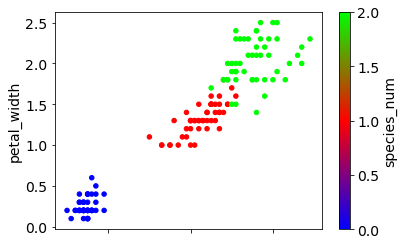

In [132]:
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap='brg');

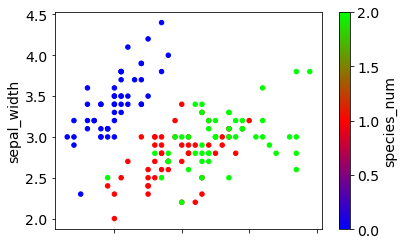

In [133]:
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='species_num', colormap='brg');

In [ ]:
#KNN Classification of the Iris Dataset
#Create your feature matrix "X"
#This will be all species measurements (sepal length, petal width, etc...)

In [134]:
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]

In [ ]:
#Create your target vector "y"
#This will be the species type.

In [135]:
y = iris.species_num

In [ ]:
#Make Use of Train-Test-Split
#Split your data in to train and test sets.

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [ ]:
#Import KNN From scikit-learn and Instatiate a Model With One Neighbor

In [137]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
#Check the Accuracy
#Train your model using the training set then use the test set to determine the accuracy

In [138]:
# Fit the model
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Score the model
import sklearn.metrics as metrics
score = metrics.accuracy_score(y_test, y_pred)
print(f' Score: {score}')

 Score: 0.8947368421052632


In [ ]:
#Create a Model With Five Neighbors. Did it Improve?

In [139]:
#instantiate
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)
# Score the model
score = metrics.accuracy_score(y_test, y_pred)
print(f' Score: {score}')

 Score: 0.9736842105263158
